In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
classifications_loc = '/data/galaxy_zoo/weekly_dumps/2017-10-22_galaxy_zoo_decals_classifications.csv'
df = pd.read_csv(classifications_loc)
df.head()

,id,subject_id,user,created_at,lang,user_agent,decals-0,decals-1,decals-2,decals-3,decals-4,decals-5,decals-6,decals-7,decals-8,decals-9,decals-10,decals-11
0,55e8b5061766270dbc005058,55a7d7a37a726119cd0006a0,KWillett,2015-09-03 21:00:54 UTC,en,unknown,a-1,a-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55e8b5151766270fb100516a,55a7d7a27a726119cd000582,KWillett,2015-09-03 21:01:09 UTC,en,unknown,a-1,a-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55e8b69117662710f8004e04,55a7d7a37a726119cd0007a1,KWillett,2015-09-03 21:07:29 UTC,en,unknown,a-1,a-1,a-0,a-0,a-2,a-1,a-2,NaN,NaN,a-1,a-0,a-0
3,55e8b6b417662710f8004e0d,55a7d7a37a726119cd0005e3,KWillett,2015-09-03 21:08:05 UTC,en,unknown,a-1,a-1,a-0,a-0,a-1,a-2,a-1,NaN,NaN,a-3,a-0,a-0
4,55e8b86e176627129b005008,55a7d7a27a726119cd00036c,KWillett,2015-09-03 21:15:26 UTC,en,unknown,a-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a-0,a-3,a-0,a-1


In [14]:
bar_answers = df['decals-4']
bar_answers.value_counts()
bar_df = df[['subject_id', 'decals-4']]
mapping = {
    'a-0': 'no_bulge',
    'a-1': 'obvious',
    'a-2': 'dominant',
    'NaN': np.nan,
    'nan': np.nan
}
bar_df['bar_response'] = bar_df['decals-4'].apply(lambda x: mapping[str(x)])
bar_df = bar_df.dropna(subset=['bar_response'])
del bar_df['decals-4']

a-1    221135
a-2     68316
a-0     54088
Name: decals-4, dtype: int64

/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [15]:
bar_df.sample(10)

,subject_id,bar_response
384056,55a7d7ad7a726119cd0060c2,dominant
1567670,55a7d7af7a726119cd00764a,obvious
1132877,55a7d7a77a726119cd002ec5,obvious
1050457,55a7d7a27a726119cd0004bb,dominant
1626295,55a7d7af7a726119cd0071d7,no_bulge
1317721,55a7d7a27a726119cd0004da,obvious
592761,55a7d7b47a726119cd009e6b,no_bulge
163330,55a7d7b07a726119cd007bb7,obvious
796096,55a7d7b17a726119cd0081b0,obvious
1199104,55a7d7a37a726119cd00066c,dominant


In [16]:
def count_responses(series):
    counts = {
        'no_bulge': 0,
        'obvious': 0,
        'dominant': 0
    }
    for value in list(series):
        print(value)
        counts[value] = counts[value] + 1
        print(counts[value])
        raise Exception
    return counts

def count_if_no_bulge(series):
    return len(series[series == 'no_bulge'])
def count_if_obvious(series):
    return len(series[series == 'obvious'])
def count_if_dominant(series):
    return len(series[series == 'dominant'])

response_df = bar_df.groupby('subject_id').agg([count_if_no_bulge, count_if_obvious, count_if_dominant]).reset_index()
display(response_df.head())

subject_id      bar_response                   \
                            count_if_no_bulge count_if_obvious   
0  55a7d7a27a726119cd00000b                 0               12   
1  55a7d7a27a726119cd00000c                 0                1   
2  55a7d7a27a726119cd00000d                 0                1   
3  55a7d7a27a726119cd00000e                 4               11   
4  55a7d7a27a726119cd00000f                 1                4   

                     
  count_if_dominant  
0                 1  
1                 0  
2                 0  
3                 0  
4                 1

In [17]:
response_df = response_df['bar_response']

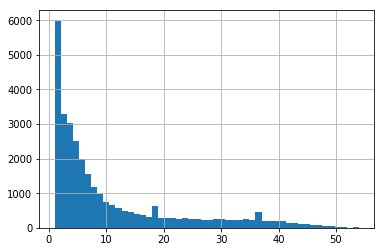

In [18]:
response_df['total_responses'] = response_df['count_if_no_bulge'] + response_df['count_if_obvious'] + response_df['count_if_dominant']
response_df['total_responses'].hist(bins=50)

In [19]:
response_df['no_bulge_frac'] = response_df['count_if_no_bulge'] / response_df['total_responses']
response_df['obvious_frac'] = response_df['count_if_obvious'] / response_df['total_responses']
response_df['dominant_frac'] = response_df['count_if_dominant'] / response_df['total_responses']

In [20]:
responses = response_df[response_df['total_responses'] > 10]

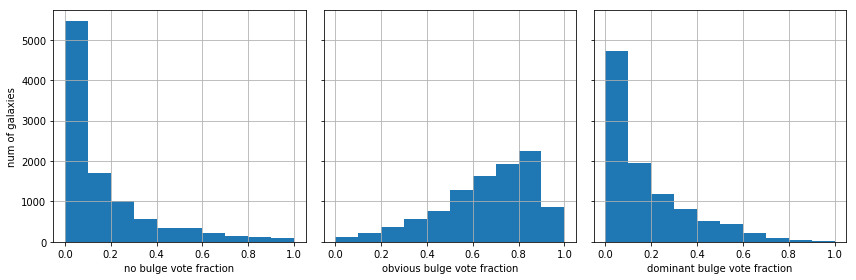

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)
responses['no_bulge_frac'].hist(ax=axes[0])
axes[0].set_xlabel('no bulge vote fraction')
responses['obvious_frac'].hist(ax=axes[1])
axes[1].set_xlabel('obvious bulge vote fraction')
responses['dominant_frac'].hist(ax=axes[2])
axes[2].set_xlabel('dominant bulge vote fraction')
axes[0].set_ylabel('num of galaxies')
fig.tight_layout()

In [29]:
def compare_remaining_votes(df, col_baseline, col_a, col_b, ax):
    
    color={
        'count_if_no_bulge': 'b',
        'count_if_obvious': 'r', 
        'count_if_dominant': 'g'
    }
    vote_frac_bins = np.linspace(start=0, stop=30, num=30)
    mean_col_a = []
    mean_col_b = []
    df['bin_index'] = np.digitize(df[col_baseline], bins=vote_frac_bins)
    for bin_index in range(len(vote_frac_bins)):
        selected = df[df['bin_index'] == bin_index]
        mean_col_a.append(selected[col_a].mean())
        mean_col_b.append(selected[col_b].mean())
    ax.plot(vote_frac_bins, mean_col_a, color[col_a])
    ax.plot(vote_frac_bins, mean_col_b, color[col_b])
    ax.set_xlabel('{} votes'.format(col_baseline.replace('count_if_', '')))
    ax.set_ylabel('other votes')
    ax.legend([col_a.replace('count_if_', ''), col_b.replace('count_if_', '')])

/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/data/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


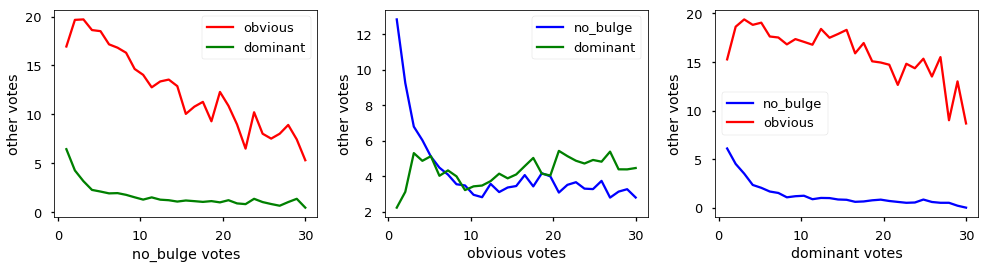

In [100]:
import seaborn as sns
sns.set_context('talk')
fig, axes = plt.subplots(ncols=3, figsize=(14, 4))
compare_remaining_votes(responses, 'count_if_no_bulge', 'count_if_obvious', 'count_if_dominant', axes[0])
compare_remaining_votes(responses, 'count_if_obvious', 'count_if_no_bulge', 'count_if_dominant', axes[1])
compare_remaining_votes(responses, 'count_if_dominant', 'count_if_no_bulge', 'count_if_obvious', axes[2])
fig.tight_layout()

In [103]:
def compare_remaining_fractions(df, col_baseline, col_a, col_b, ax):
    
    # define line colors for plot
    color={
        'count_if_no_bulge': 'b',
        'count_if_obvious': 'r', 
        'count_if_dominant': 'g'
    }
    
    # 20 vote fraction bins from 0 to 1
    vote_frac_bins = np.linspace(start=0., stop=.8, num=20)
    baseline_vote_fraction = df[col_baseline] / (df[col_baseline] + df[col_a] + df[col_b])

    # for every row, work out which vote fraction bin it should be in
    bin_indices = np.digitize(baseline_vote_fraction, bins=vote_frac_bins)
    bin_indices = bin_indices - 1 # should be bin 0 through bin 19, not bin 1 through 20

    mean_col_a_votes = np.zeros_like(vote_frac_bins)
    mean_col_b_votes = np.zeros_like(vote_frac_bins)
    # for all the rows in each vote fraction bin, what's the mean number of votes?
    for bin_index in range(20):
        selected = df[bin_indices == bin_index]  # values with that baseline vote fraction
        mean_col_a_votes[bin_index] = selected[col_a].mean() # mean num. of votes for col_a
        mean_col_b_votes[bin_index] = selected[col_b].mean() # mean num. of votes for col b

    total_other_votes = mean_col_a_votes + mean_col_b_votes
    ax.plot(vote_frac_bins, mean_col_a_votes/total_other_votes, color[col_a])
    ax.plot(vote_frac_bins, mean_col_b_votes/total_other_votes, color[col_b])
    ax.set_xlabel('{} vote fraction'.format(col_baseline.replace('count_if_', '')))
    ax.set_ylabel('fraction of other votes')
    ax.legend([col_a.replace('count_if_', ''), col_b.replace('count_if_', '')])

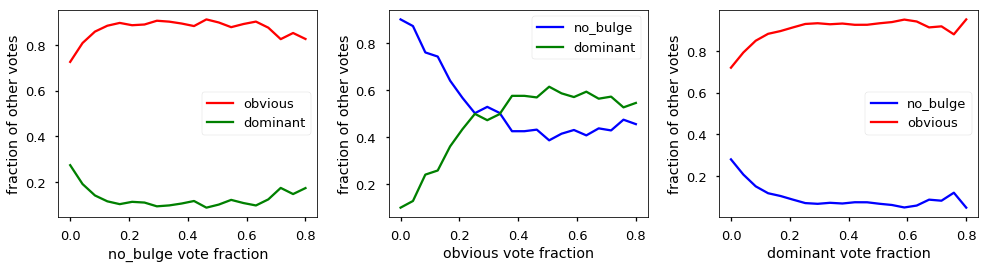

In [104]:
import seaborn as sns
sns.set_context('talk')
fig, axes = plt.subplots(ncols=3, figsize=(14, 4))
compare_remaining_fractions(responses, 'count_if_no_bulge', 'count_if_obvious', 'count_if_dominant', axes[0])
compare_remaining_fractions(responses, 'count_if_obvious', 'count_if_no_bulge', 'count_if_dominant', axes[1])
compare_remaining_fractions(responses, 'count_if_dominant', 'count_if_no_bulge', 'count_if_obvious', axes[2])
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True)
_ = axes[0].hist2d(responses['no_bulge_frac'], responses['obvious_frac'])
_ = axes[1].hist2d(responses['no_bulge_frac'], responses['dominant_frac'])
_ = axes[2].hist2d(responses['obvious_frac'], responses['dominant_frac'])